In [5]:
%matplotlib inline
from __future__ import print_function # py 2.7 compat.

import sys
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

# Import widgets for interactive notebook
from IPython.html.widgets import interact, fixed
from IPython.html import widgets

from Utilities.metutils import convert

In [6]:
try:
    import wind.windmodels as windmodels
except ImportError:
    print("Cannot import windmodels. Check that the TCRM folder is in the PYTHONPATH")
    
holland = windmodels.HollandWindProfile

In [7]:
def plot_profile(lat, penv, pcentre, rmax, beta ):
    
    if penv < pcentre:
        print("Central pressure must be less than environmental pressure")
        return None
    r = np.arange(1, 201, 0.5)
    h = holland(lat, 150., convert(penv, "hPa", "Pa"), convert(pcentre, "hPa", "Pa"), rmax, beta)
    
    V = h.velocity(r)
    Z = h.vorticity(r)
    
    fig = plt.figure(figsize=(12,8))
    ax1 = plt.subplot(1,1,1)
    ax1.plot(r, V, linestyle='-', color='b', linewidth='2', label="Velocity (m/s)")
    ax1.set_ylabel("Velocity (m/s)")
    l = ax1.legend(loc='upper left')
    for t in l.get_texts():
        t.set_fontsize('x-small')
    
    ax2 = ax1.twinx()
    ax2.plot(r, Z, linestyle='-', color='r', linewidth='2', label="Vorticity (/s)")
    
    ax2.set_xlabel("Radius")
    ax2.axvline(rmax, linewidth=1, color='0.5')
    ax2.set_xlim((0, 200))
    l = ax2.legend(loc='upper right')
    for t in l.get_texts():
        t.set_fontsize('x-small')
    plt.grid(axis='both')

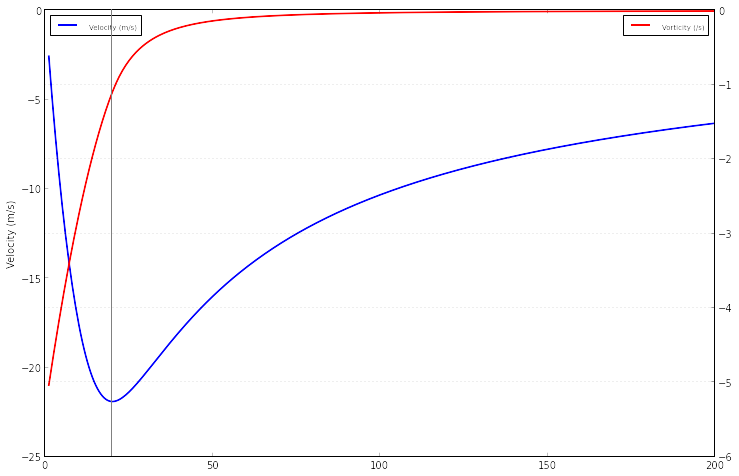

In [8]:
interact(plot_profile, 
         lat=widgets.FloatSlider(min=-30., max=30.0, step=0.05, value=-15.), 
         penv=widgets.FloatSlider(min=990., max=1010.0, step=0.05, value=1000.),
         pcentre=widgets.FloatSlider(min=900., max=1010.0, step=0.05, value=990.),
         rmax=widgets.FloatSlider(min=1., max=100.0, step=0.5, value=20.),
         beta=widgets.FloatSlider(min=0.5, max=3.0, step=0.01, value=1.5))